<a href="https://colab.research.google.com/github/Mugunthan-2003/Linear-Algebra-Coding-way/blob/main/Diagonalization/Diagonalization_Notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

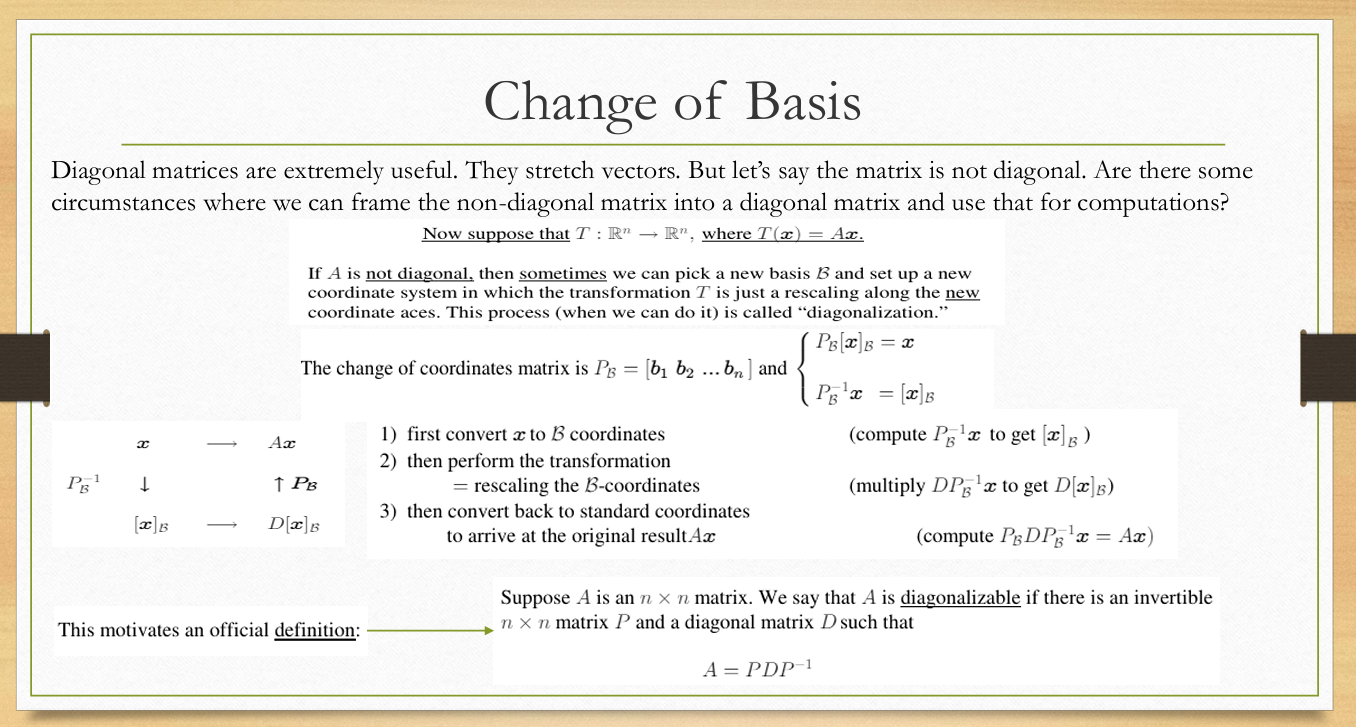

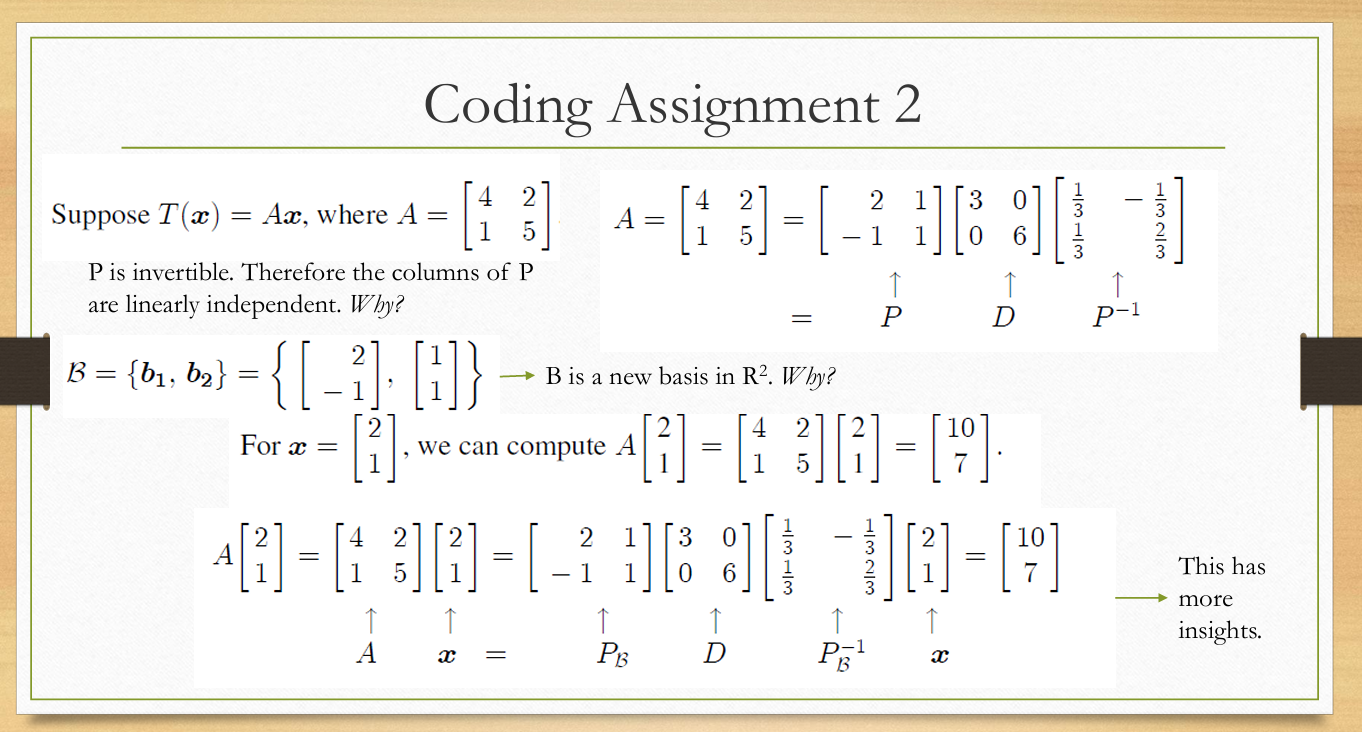

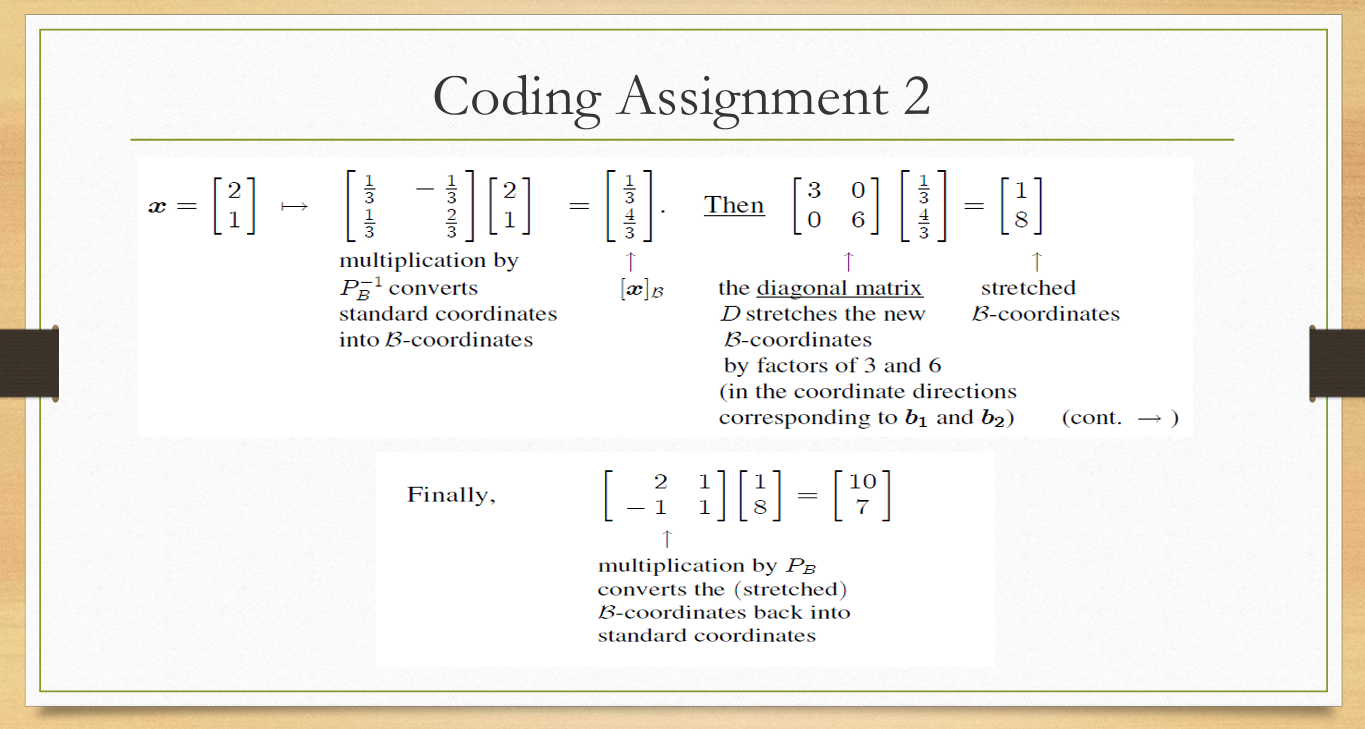

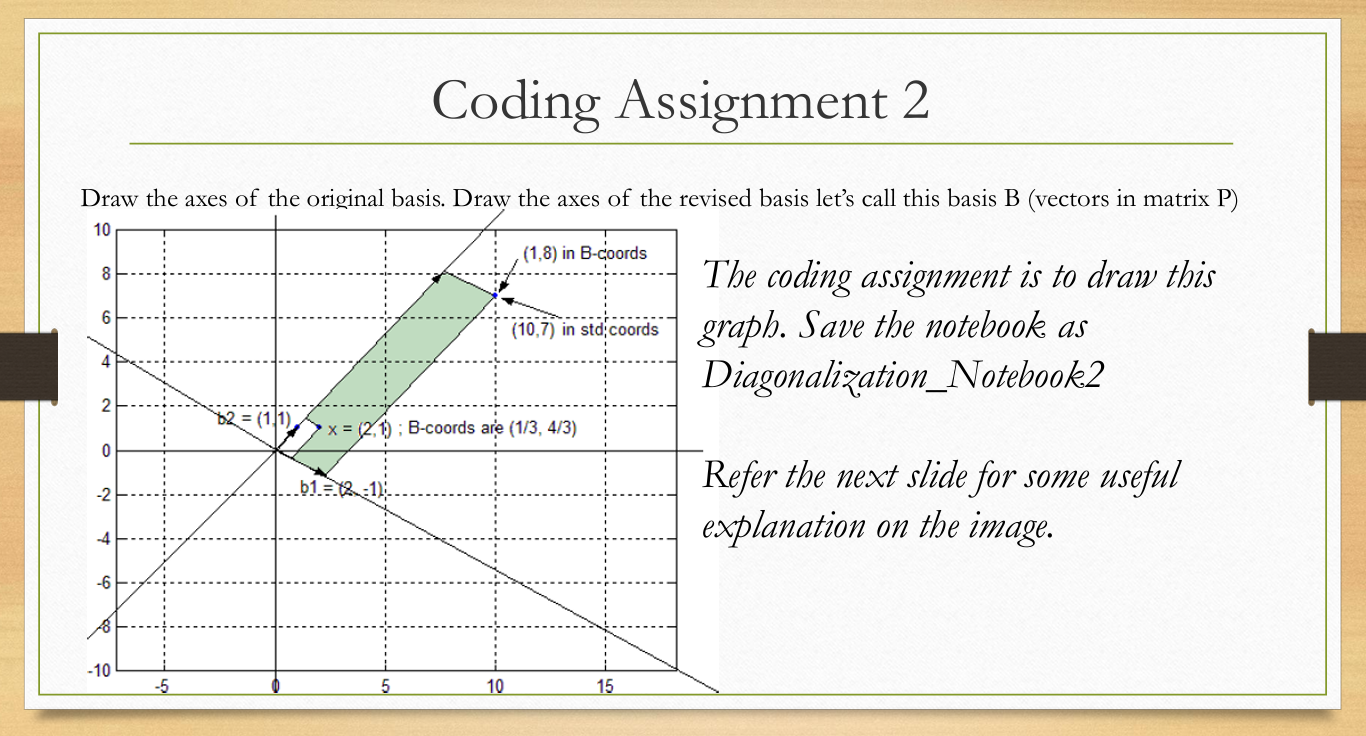

On Diagonalization of non-diagonal matrix , Three marrix can be obtained.
1. P : Matrix which contain the basis vectors
2. D : Corresponding Diagonal matrix for scaling
3. P^-1 : Inverse of P

The Following steps are followed :
1. When a vector x is multiplied with P^-1 , It's coordinates get changed with respect to basis vectors from standard basis , which is
[x]b .
2. when [x]b is multiplied with D , vector gets scaled with respect to basis vectors .
3. The scaled vectors with respect to basis , is multiplied with P to get transformed vectors with respect to standard basis .

In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def diagonalisation(A):
    # Find the eigenvalues and eigenvectors
    P,D = sp.Matrix(A).diagonalize()
    P_inverse=np.linalg.inv(np.array(P).astype(np.float64))
    return P,D,P_inverse

In [3]:
A = np.array([[4, 2], [1, 5]])
X = np.array([[2],[1]])
P,D,P_inv=diagonalisation(A)
print("P =\n",P)
print("\nD=\n",D)
print("\nP^-1\n=",P_inv)

P =
 Matrix([[-2, 1], [1, 1]])

D=
 Matrix([[3, 0], [0, 6]])

P^-1
= [[-0.33333333  0.33333333]
 [ 0.33333333  0.66666667]]


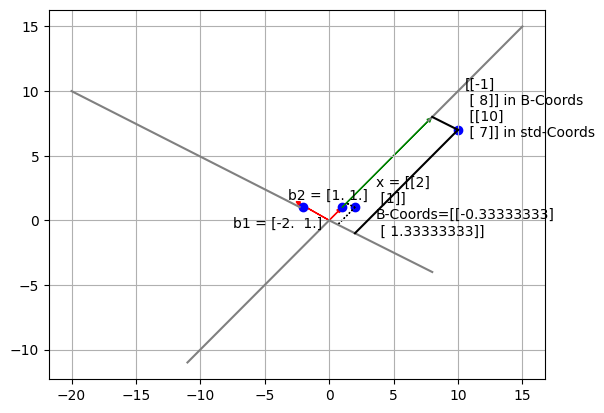

In [4]:
def plot_graph(P, D, P1, x):
    start = (0, 0)

    # Define ending points for arrows
    # setting column vectors as basis
    end_b1 = np.array(P[:, 0])       # (2, -1)
    end_b2 = np.array(P[:, 1])       # (1, 1)
    #print("end_b1\n", end_b1)
    #print("end_b2\n", end_b2)

    x_on_b = P1 @ x                                     # (1/3, 4/3)
    #print("x_on_b\n", x_on_b)
    stretched_x = np.array(D @ P1 @ x, dtype="int")   # (1, 8)
    #print("stretched_x\n", stretched_x)
    std_stretched_x = np.array(P @ D @ P1 @ x, dtype="int")                        # (10, 7)
    #print("std_stretched_x\n", std_stretched_x)
    std_stretched_x_along_b2 = np.array([end_b2[0], end_b2[1]]) * stretched_x[1]  # (8, 8)
    #print("std_stretched_x_along_b2\n",std_stretched_x_along_b2)
    std_stretched_x_along_b1 = np.array([end_b1[0], end_b1[1]]) * stretched_x[0]  # (2, -1)
    #print("std_stretched_x_along_b1\n", std_stretched_x_along_b1)
    x_along_b2 = np.array([end_b2[0], end_b2[1]]) * x_on_b[1]
    x_along_b1 = np.array([end_b1[0], end_b1[1]]) * x_on_b[0]
    #print("x_along_b2\n", x_along_b2)
    #print("x_along_b1\n", x_along_b1)

    # Plot arrows
    #basis2
    plt.plot([std_stretched_x_along_b2[0]-0.3, 15*end_b2[0]], [std_stretched_x_along_b2[1]-0.3, 15*end_b2[1]], color='gray')
    plt.plot([0, -11*end_b2[0]], [0, -11*end_b2[1]], color='gray')
    #basis1
    plt.plot([end_b1[0]-start[0]-0.3, 10*end_b1[0]], [end_b1[1]-start[1]+0.03, 10*end_b1[1]], color='gray')
    plt.plot([0, -4*end_b1[0]], [0, -4*end_b1[1]], color='gray')

    #line_to_stretched_x_along_b2
    plt.plot([std_stretched_x_along_b2[0], std_stretched_x[0][0]], [std_stretched_x_along_b2[1], std_stretched_x[1][0]], color='black')
    #line_to_stretched_x_along_b1
    plt.plot([std_stretched_x_along_b1[0], std_stretched_x[0][0]], [std_stretched_x_along_b1[1], std_stretched_x[1][0]], color='black')

    plt.arrow(start[0],start[1], end_b1[0]-start[0]-0.3, end_b1[1]-start[1]+0.3, head_width=0.3, head_length=0.3, fc='red', ec='red')
    plt.arrow(*start, end_b2[0]-start[0]-0.3, end_b2[1]-start[1]-0.3, head_width=0.3, head_length=0.3, fc='red', ec='red')
    plt.scatter(end_b1[0], end_b1[1], color='blue')
    plt.scatter(end_b2[0], end_b2[1], color='blue')
    plt.scatter(x[0], x[1], color='blue')
    plt.scatter(std_stretched_x[0], std_stretched_x[1], color='blue')
    x2=std_stretched_x_along_b2[0]-end_b2[0]-0.3
    y2=std_stretched_x_along_b2[1]-end_b2[1]-0.3
    plt.arrow(end_b2[0],end_b2[0],round(x2,1),round(y2,1), head_width=0.3, head_length=0.3, fc='green', ec='green')

    plt.arrow(x_along_b1[0], x_along_b1[1], x[0][0]-(x_along_b1[0]), x[1][0]-(x_along_b1[1]), head_width=0, head_length=0, fc='black', ec='black', linestyle='dotted')
    plt.arrow(x_along_b2[0], x_along_b2[1], x[0][0]-(x_along_b2[0]), x[1][0]-(x_along_b2[1]), head_width=0, head_length=0, fc='black', ec='black', linestyle='dotted')

    # Add labels near the arrow heads
    plt.annotate(f'b1 = {end_b1}', xy=(end_b1[0]+1, end_b1[1]-1.01), xytext=(-60,-5), textcoords='offset points')
    plt.annotate(f'b2 = {end_b2}', xy=(end_b2[0]-1, end_b2[1]-0.5), xytext=(-30, 10), textcoords='offset points')
    plt.annotate(f'x = {x}\nB-Coords={x_on_b}', xy=(x[0], x[1]), xytext=(15,-20), textcoords='offset points')
    plt.annotate(f'{stretched_x} in B-Coords\n {std_stretched_x} in std-Coords', xy=(std_stretched_x[0], std_stretched_x[1]), xytext=(5, -5), textcoords='offset points')

    # Show plot
    plt.grid()
    plt.show()
P=np.array(P,dtype="float")
D=np.array(D,dtype="float")
P_inv=np.array(P_inv,dtype="float")
plot_graph(P,D,P_inv, X)